<div style="display:flex; align-items:center; background-color:black; padding:20px;">
  <span style="font-size:3em; color:red; font-weight:bold; margin-right:30px;">Predicting the English Premier League</span>
  <img src="logo.png" alt="logo" style="max-width:120px; height:auto; border-radius:10px; box-shadow:0 0 10px #222; background:white;">
</div>


<font size="6.5" color="yellow">Introduction about the Project</font>


The most popular and developed sport in the world is Football, and arguably the English Premier league is the most competitive, and it is therefore the most natural choice to study. The game of football is constantly evolving, and features that may be important in one generation may become less so later - there has never been an analytic definition of the game. This is where machine learning could prove invaluable.

In this project, we look at applying statistical and machine learning methods, in order to attempt at predicting match results based on historic data of the teams that play the match. A majority part of the project builds a framework that takes raw match data and creates suitable features based on historic statistics to match results. We then by using Decision trees and Random forest classifiers and finally we build deep learning logic, combine it with a number of feature selection tools, including PCA, to get the best accuracy metric.

<font size="5" color="cyan">Problem Statement</font>

The premise then lies, to build a machine learning framework, that can use historic data from football matches between two teams and learn how to best predict outcomes of games. The general outline of the steps to be taken to get to a framework that can get to the premise are as follows:                                                                   
* Recover a source of data with enough information that links team performance to final result.
* Build a tool which takes the raw data and transforms it into a format in which each match has a number of historic features based on previous games, such as 'Average goals in x games'.
* Use feature selection tools to filter out unimportant/redundant features.
* Feed features into a number of machine learning algorithms and decide on the best one to fine-tune.
* Fine-tune the chosen machine learning algorithm for the greatest accuracy.

<font size="5" color="cyan">Background & Metrics</font>

As previously stated, the use of machine learning in the gambling industry has grown in recent past. Along with this steady academic interest has also shot up as well with many academic journals and papers detailing the methodology and results gathered. One such study (PETTERSSON,NYQUIST,2017)[1] used recurrent neural networks to predict the outcome of games with in-game infomration as the game progressed; the study used an accuracy metric, which ranged from 33.5% to 98% as the game progressed. Another study (HERBINET, 2018)[2] used publically available databases along with classical machine learning algorithms (regression, svm etc) to predict match outcomes and expected goals using aggregated statistics and player ratings. The study managed to accurate predict outcome of matches 50% of time.

In this project, we will employ the use of the accuracy metric, which simply calculates the percentage of correct predictions vs total predictions of the test data:

$$Accuracy = \frac{\sum N_{C}}{\sum N_{total}}$$
 
Where  NC=1
  for a correct prediction, and  Ntotal
  is the total number of predictions.

<font size="6" color="yellow">Data Preprocessing & Exploration</font>

We sourced premier league match results from football-data.co.uk, the website has downloadable csv files for each season of the premier league from 1993. We used data from season 2000-2001 onwards as this data had the most consistancy in features throughout.

On first inspection, we see a number of features. These features describe the events that occur in the game, such as total goals by the home side (FTHG). The list below describes what each of these mean.

&nbsp;&nbsp;&nbsp;&nbsp;Div = League Division<br>&nbsp;&nbsp;&nbsp;&nbsp;Date = Match Date (dd/mm/yy)<br>&nbsp;&nbsp;&nbsp;&nbsp;HomeTeam = Home Team<br>&nbsp;&nbsp;&nbsp;&nbsp;AwayTeam = Away Team<br>&nbsp;&nbsp;&nbsp;&nbsp;FTHG and HG = Full Time Home Team Goals<br>&nbsp;&nbsp;&nbsp;&nbsp;FTAG and AG = Full Time Away Team Goals<br>&nbsp;&nbsp;&nbsp;&nbsp;FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)<br>&nbsp;&nbsp;&nbsp;&nbsp;HTHG = Half Time Home Team Goals<br>&nbsp;&nbsp;&nbsp;&nbsp;HTAG = Half Time Away Team Goals<br>&nbsp;&nbsp;&nbsp;&nbsp;HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)<br>&nbsp;&nbsp;&nbsp;&nbsp;HS = Home Team Shots<br>&nbsp;&nbsp;&nbsp;&nbsp;AS = Away Team Shots<br>&nbsp;&nbsp;&nbsp;&nbsp;HST = Home Team Shots on Target<br>&nbsp;&nbsp;&nbsp;&nbsp;AST = Away Team Shots on Target<br>&nbsp;&nbsp;&nbsp;&nbsp;HHW = Home Team Hit Woodwork<br>&nbsp;&nbsp;&nbsp;&nbsp;AHW = Away Team Hit Woodwork<br>&nbsp;&nbsp;&nbsp;&nbsp;HC = Home Team Corners<br>&nbsp;&nbsp;&nbsp;&nbsp;AC = Away Team Corners<br>&nbsp;&nbsp;&nbsp;&nbsp;HF = Home Team Fouls Committed<br>&nbsp;&nbsp;&nbsp;&nbsp;AF = Away Team Fouls Committed<br>&nbsp;&nbsp;&nbsp;&nbsp;HFKC = Home Team Free Kicks Conceded<br>&nbsp;&nbsp;&nbsp;&nbsp;AFKC = Away Team Free Kicks Conceded<br>&nbsp;&nbsp;&nbsp;&nbsp;HO = Home Team Offsides<br>&nbsp;&nbsp;&nbsp;&nbsp;AO = Away Team Offsides<br>&nbsp;&nbsp;&nbsp;&nbsp;HY = Home Team Yellow Cards<br>&nbsp;&nbsp;&nbsp;&nbsp;AY = Away Team Yellow Cards<br>&nbsp;&nbsp;&nbsp;&nbsp;HR = Home Team Red Cards



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import copy

# In this section, we will take an in-depth view of the dataset. We will see what we have available and whether we can make some initial predictions

s0001 = pd.read_csv('csv/00-01.csv')
colsToKeep = [
    'Div','Date','HomeTeam','AwayTeam','FTHG','HG','FTAG','AG','FTR','Res',
    'HTHG','HTAG','HTR','HS','AS','HST','AST','HHW','AHW','HC','AC','HF','AF',
    'HO','AO','HY','AY','HR','AR'
]
allCols = s0001.columns
colsToDrop = set(allCols) - set(colsToKeep)
s0001 = s0001.drop(labels=colsToDrop, axis=1)
### Data ###
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(s0001.head())


  Div      Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  \
0  E0  19/08/00  Charlton       Man City     4     0   H     2     0   H  17   
1  E0  19/08/00   Chelsea       West Ham     4     2   H     1     0   H  17   
2  E0  19/08/00  Coventry  Middlesbrough     1     3   A     1     1   D   6   
3  E0  19/08/00     Derby    Southampton     2     2   D     1     2   A   6   
4  E0  19/08/00     Leeds        Everton     2     0   H     2     0   H  17   

   AS  HST  AST  HHW  AHW  HC  AC  HF  AF  HO  AO  HY  AY  HR  AR  
0   8   14    4    2    1   6   6  13  12   8   6   1   2   0   0  
1  12   10    5    1    0   7   7  19  14   2   3   1   2   0   0  
2  16    3    9    0    1   8   4  15  21   1   3   5   3   1   0  
3  13    4    6    0    0   5   8  11  13   0   2   1   1   0   0  
4  12    8    6    0    0   6   4  21  20   6   1   1   3   0   0  


We constructed basic statistics on the data, the table below shows this in detail.

In [2]:
describe = (s0001.describe())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print((s0001.describe()))

             FTHG        FTAG        HTHG        HTAG          HS          AS  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     1.544737    1.065789    0.686842    0.476316   12.792105    9.378947   
std      1.285436    1.029070    0.843623    0.694469    4.859117    3.609366   
min      0.000000    0.000000    0.000000    0.000000    0.000000    2.000000   
25%      1.000000    0.000000    0.000000    0.000000    9.000000    7.000000   
50%      1.000000    1.000000    0.000000    0.000000   12.000000    9.000000   
75%      2.000000    2.000000    1.000000    1.000000   16.000000   12.000000   
max      6.000000    4.000000    5.000000    4.000000   33.000000   24.000000   

              HST         AST         HHW         AHW          HC          AC  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     6.163158    4.531579    0.381579    0.223684    6.289474    4.647368   
std      2.991582    2.2393

Based on the above results There are 380 matches in a full season, as expected for a 20-team league.
Home teams generally have higher averages in key stats like goals scored and shots on target, indicating a home advantage.
Away teams tend to have higher averages in defensive stats such as fouls and cards, suggesting they are under more pressure.
These patterns highlight the importance of including a "home/away" feature in predictive models, as performance metrics differ significantly based on match location.

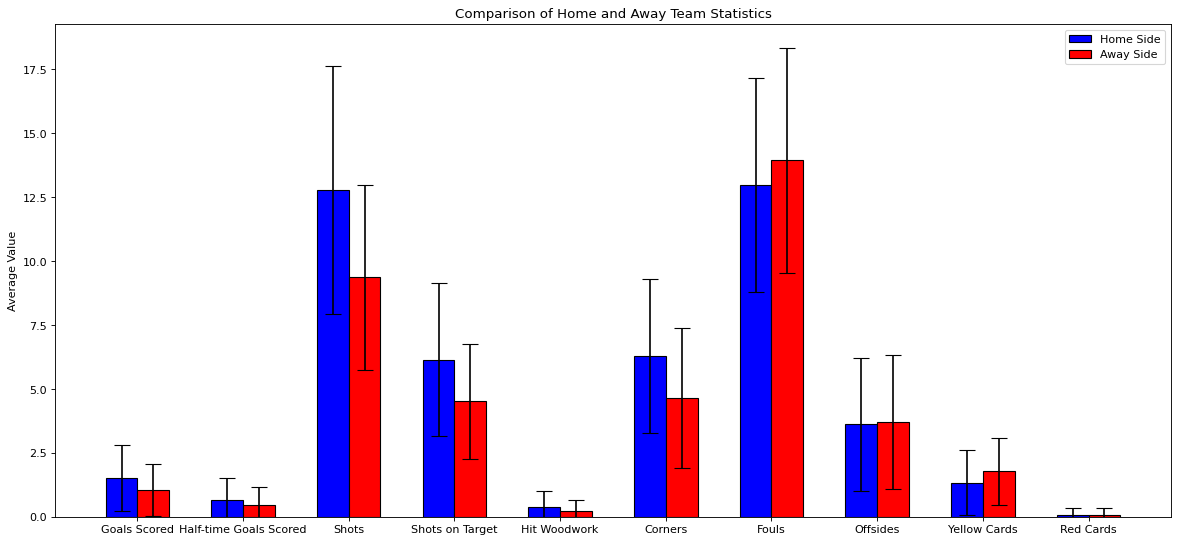

In [3]:
%matplotlib inline
fig = plt.figure(figsize=(18, 8), dpi=80, facecolor='w', edgecolor='k')
# width of the bars
barWidth = 0.3
# Home side features
home_features = ['FTHG','HTHG','HS','HST','HHW','HC','HF','HO','HY','HR']
# Away side features
away_features = ['FTAG','HTAG','AS','AST','AHW','AC','AF','AO','AY','AR']
# Mean values for home and away
bars1 = describe.loc['mean', home_features].values
bars2 = describe.loc['mean', away_features].values
# Standard deviation for error bars
yer1 = describe.loc['std', home_features].values
yer2 = describe.loc['std', away_features].values
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# Create blue bars (Home)
plt.bar(r1, bars1, width=barWidth, color='blue', edgecolor='black', yerr=yer1, capsize=7, label='Home Side')
# Create red bars (Away)
plt.bar(r2, bars2, width=barWidth, color='red', edgecolor='black', yerr=yer2, capsize=7, label='Away Side')
# general layout
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Goals Scored', 'Half-time Goals Scored', 'Shots','Shots on Target','Hit Woodwork', 'Corners','Fouls','Offsides','Yellow Cards','Red Cards'])
plt.ylabel('Average Value')
plt.ylim(0)
plt.legend()
plt.title('Comparison of Home and Away Team Statistics')
plt.show()

The raw format of the data is not suitable to predict anything. We need to consider that features must be of historic values compared to targets and our framework must be flexible to allow us to select the number of games to lookback on. In this project we implement the following

1) A queryable database of:
* games, keyed on season and the team.
* Season long statistics that will be used as fixed team attributes

2) A table of featrues and targets that is made by querying the built-up database, with build paremeters allowing one to choose lookback period.

<font size="5" color="cyan">Building the Database</font>

We take the raw data format and load it into multiple Pandas' dataframe keyed by the season (2000-2025)

In [4]:
import os
import pandas as pd

def loadIntoDict(loc):
    df = pd.read_csv(loc, na_filter=True)
    colsToKeep = [
        "Div","Date","HomeTeam","AwayTeam","FTHG","HG","FTAG","AG","FTR","Res",
        "HTHG","HTAG","HTR","Attendance","Referee","HS","AS","HST","AST","HHW","AHW",
        "HC","AC","HF","AF","HFKC","AFKC","HO","AO","HY","AY","HR","AR","HBP","ABP"
    ]
    allCols = df.columns
    colsToDrop = set(allCols) - set(colsToKeep)
    return df.drop(labels=colsToDrop, axis=1)

# Initialise dict
raw_season_data = {}
# Load in raw csvs from the 'csv' directory
csv_dir = 'csv'
for i, j in enumerate(sorted(os.listdir(csv_dir))):
    if j.endswith('.csv'):
        raw_season_data[j] = loadIntoDict(os.path.join(csv_dir, j))

print("The following seasons have been loaded in raw format (filenames):")
print(list(raw_season_data.keys()))

The following seasons have been loaded in raw format (filenames):
['00-01.csv', '01-02.csv', '02-03.csv', '03-04.csv', '04-05.csv', '05-06.csv', '06-07.csv', '07-08.csv', '08-09.csv', '09-10.csv', '10-11.csv', '11-12.csv', '12-13.csv', '13-14.csv', '14-15.csv', '15-16.csv', '16-17.csv', '17-18.csv', '18-19.csv', '19-20.csv', '20-21.csv', '21-22.csv', '22-23.csv', '23-24.csv', '24-25.csv']


Next, we build the match 'snapshot' table. For each season, each team will have their matches, whether home or away recorded with the datapoints relating to those games available as a seasonal snapshot. We also record match results as a feature, and one-hot encode them into Win, Lose, Draw features. We see that we can query this database for each team and season via the command at the end: snapshots[10]['Liverpool']